In [1]:
import pandas as pd

data = pd.read_csv("output/vader_labelled6.csv")
# data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.2'])

In [2]:
descriptive_stats = data.describe()
print(descriptive_stats)

          Positive     Negative      Neutral     Compound
count  3435.000000  3435.000000  3435.000000  3435.000000
mean      0.127194     0.031684     0.827729     0.214545
std       0.137680     0.071398     0.173594     0.365612
min       0.000000     0.000000     0.000000    -0.950100
25%       0.000000     0.000000     0.742500     0.000000
50%       0.104000     0.000000     0.852000     0.177900
75%       0.204000     0.000000     1.000000     0.493900
max       0.796000     0.722000     1.000000     0.955500


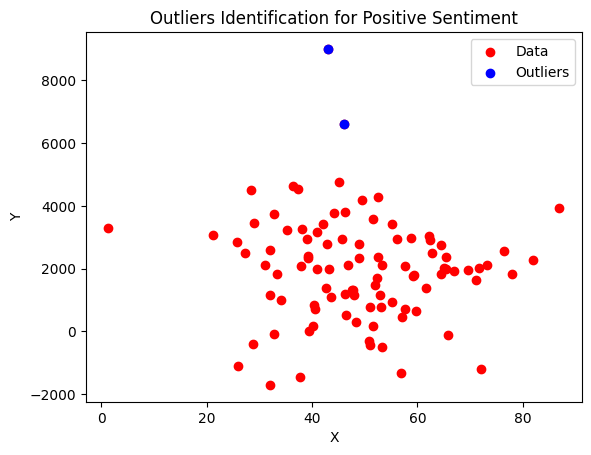

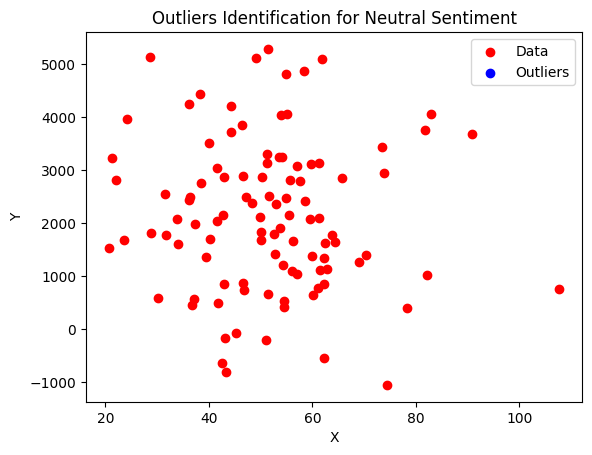

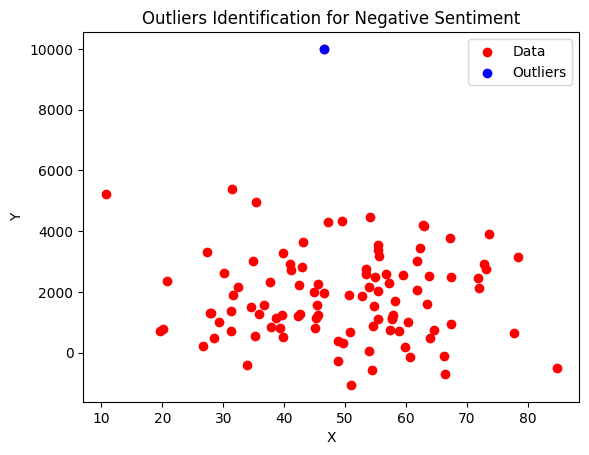

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mengidentifikasi outliers menggunakan metode IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Fungsi untuk memplot data dengan outliers
def plot_outliers(data, outliers, category):
    plt.scatter(data['X'], data['Y'], color='red', label='Data')
    plt.scatter(outliers['X'], outliers['Y'], color='blue', label='Outliers')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Outliers Identification for {category} Sentiment')
    plt.legend()
    plt.show()

# Contoh data
np.random.seed(42)
data = pd.DataFrame({
    'X': np.random.normal(50, 15, 300),  # 300 data points with mean 50 and std 15
    'Y': np.random.normal(2000, 1500, 300),  # 300 data points with mean 2000 and std 1500
    'Sentiment': np.random.choice(['Positive', 'Neutral', 'Negative'], 300)  # Random sentiment labels
})

# Memperkenalkan beberapa outliers
data.loc[5, 'Y'] = 10000
data.loc[10, 'Y'] = 9000

# Pisahkan data berdasarkan sentimen
positive_data = data[data['Sentiment'] == 'Positive']
neutral_data = data[data['Sentiment'] == 'Neutral']
negative_data = data[data['Sentiment'] == 'Negative']

# Mengidentifikasi outliers untuk setiap kategori sentimen
positive_outliers = identify_outliers(positive_data, 'Y')
neutral_outliers = identify_outliers(neutral_data, 'Y')
negative_outliers = identify_outliers(negative_data, 'Y')

# Plot outliers untuk setiap kategori sentimen
plot_outliers(positive_data, positive_outliers, 'Positive')
plot_outliers(neutral_data, neutral_outliers, 'Neutral')
plot_outliers(negative_data, negative_outliers, 'Negative')
